In [82]:
import torch
import random
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
import pandas as pd

In [83]:
size = 128

In [84]:
class CatNet(nn.Module):
    def __init__(self, inputsize, outputsize):
        super().__init__()
        self.inputsize = inputsize
        self.outputsize = outputsize
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(1, 8, 10, stride=2),
            torch.nn.BatchNorm2d(8),
            torch.nn.ReLU(),
            torch.nn.Conv2d(8, 16, 6, stride=2),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, 6, stride=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32, 64, 5, stride=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, 3, stride=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(128, 256, 2, stride=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(256, outputsize*2),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(outputsize*2, outputsize)
        ) 
    def forward(self, x):
        return self.model(x)


In [85]:
train_dataset = torch.load("datasets/train.pt")
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=False)
train_dataloader_1 = torch.utils.data.DataLoader(train_dataset)
test_dataset = torch.load("datasets/test.pt")
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)
test_dataloader_1 = torch.utils.data.DataLoader(test_dataset)
result_dataset = torch.load("datasets/predict.pt")
result_dataloader_1 = torch.utils.data.DataLoader(result_dataset)

In [86]:
num_epochs = 30
learning_rate = 9e-4
weight_decay = 0.1
model = CatNet(16, 18)
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
loss_history = []
epoch_loss_history = []

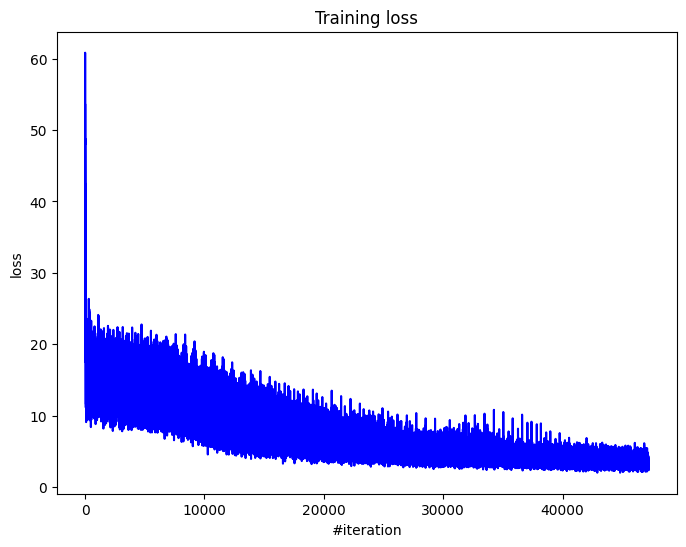

1/60 current loss: 11.24067211151123
2/60 current loss: 10.905632972717285
3/60 current loss: 11.194676399230957
4/60 current loss: 10.636859893798828
5/60 current loss: 10.592700958251953
6/60 current loss: 10.73336410522461
7/60 current loss: 10.613177299499512
8/60 current loss: 10.774476051330566
9/60 current loss: 11.13203239440918
10/60 current loss: 10.660099029541016
11/60 current loss: 9.299271583557129
12/60 current loss: 7.763097286224365
13/60 current loss: 7.245535850524902
14/60 current loss: 7.0879950523376465
15/60 current loss: 6.655838966369629
16/60 current loss: 5.659749984741211
17/60 current loss: 5.34940767288208
18/60 current loss: 5.77902889251709
19/60 current loss: 5.505841255187988
20/60 current loss: 5.639982223510742
21/60 current loss: 5.595104694366455
22/60 current loss: 5.992734909057617
23/60 current loss: 5.1783318519592285
24/60 current loss: 5.779365062713623
25/60 current loss: 5.547026634216309
26/60 current loss: 4.882833957672119
27/60 current 

In [87]:
for i in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        predictions = model.forward(x_batch)
        
        loss = criterion(predictions, y_batch)

        # Backward
        loss.backward()

        # Update weights
        optimizer.step()
        optimizer.zero_grad() 

        loss_history.append(loss.item())
    epoch_loss_history.append(loss)
      
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))

    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    
    plt.show()

    for i in range(len(epoch_loss_history)):
        print(f'{i+1}/{num_epochs} current loss: {epoch_loss_history[i]}') 

In [88]:
torch.save(model.state_dict, 'weights/CatNet.pth')

In [89]:
model = CatNet(16, 18)
model.load_state_dict(torch.load('weights/CatNet.pth')())
model.eval()

CatNet(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(10, 10), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(6, 6), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(6, 6), stride=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=

In [90]:
from sklearn.metrics import mean_absolute_error
real = []
pred = []
for x, y in train_dataloader_1:
    preds = model.forward(x)
    real.append(y[0].tolist())
    pred.append(preds[0].tolist())
print(f"MAE on train data : {mean_absolute_error(real, pred)}")
real = []
pred = []
for x, y in test_dataloader_1:
    preds = model.forward(x)
    real.append(y[0].tolist())
    pred.append(preds[0].tolist())
print(f"MAE on test data : {mean_absolute_error(real, pred)}")

MAE on train data : 6.06895252023514
MAE on test data : 9.877861333507246


C:\Users\Oleg\AppData\Local\Temp\ipykernel_12924\1514885454.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_12924\1514885454.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')
C:\Users\Oleg\AppData\Local\Temp\ipykernel_12924\1514885454.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axs[num, i].plot(x,y, 'ro', color = 'blue')


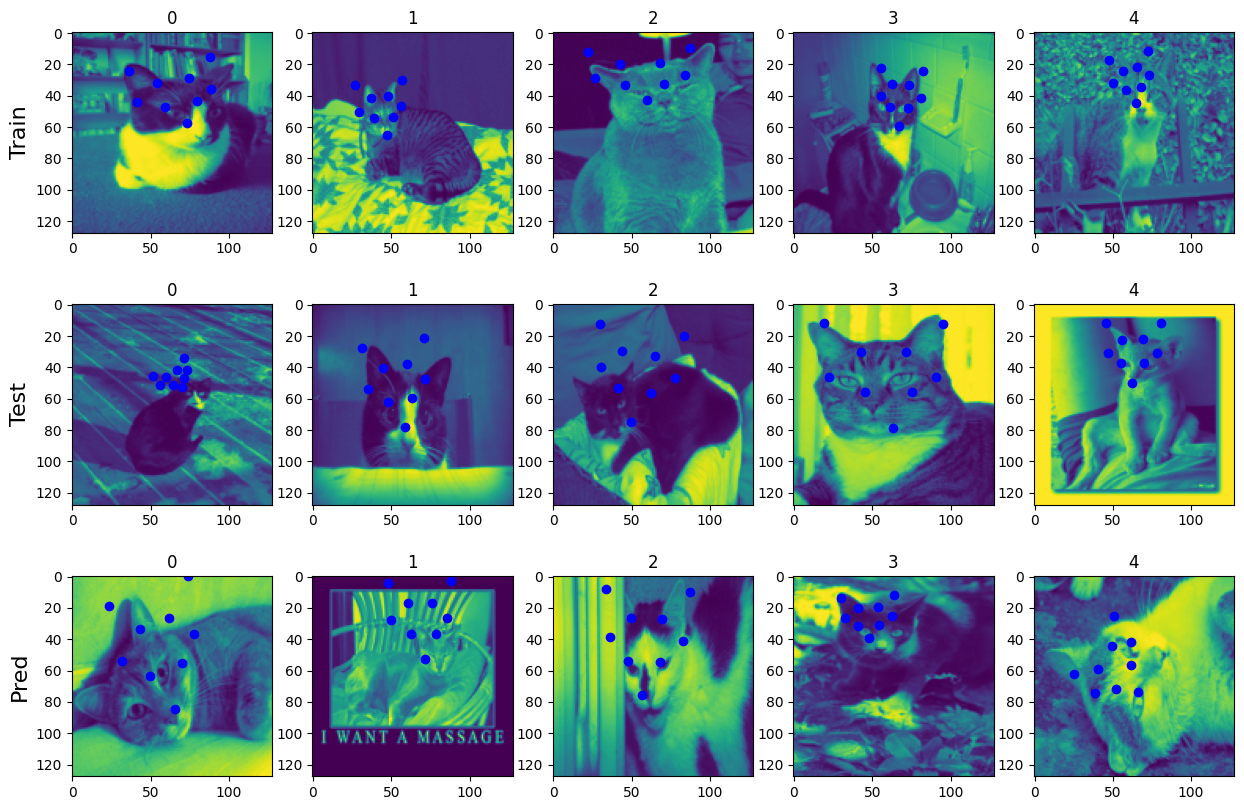

In [91]:
fig, axs = plt.subplots(nrows= 3 , ncols= 5,  figsize=(15,10))
cats_nums = range(5)
num = 0
axs[num,0].set_ylabel('Train', fontsize=16)
for i in cats_nums:
    x, y = train_dataset[i]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')
num = 1
axs[num,0].set_ylabel('Test', fontsize=16)
for i in cats_nums:
    x, y = test_dataset[i]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')
num = 2
axs[num,0].set_ylabel('Pred', fontsize=16)
for i in cats_nums:
    x = result_dataset[i][0]
    axs[num, i].set_title(str(i))
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axs[num, i].imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axs[num, i].plot(x,y, 'ro', color = 'blue')

In [92]:
import torch 
import pandas as pd
from PIL import Image 
from os import listdir
from os.path import isfile, join
import torchvision.transforms as transforms 
import pandas as pd
import matplotlib.pyplot as plt
import math

size1 = 128
size2 = 128
train_split_size = 0.3

def get_img_by_name(name):
    transform_with_size = transforms.Compose([ 
        transforms.PILToTensor(),
        transforms.Resize((size1, size2)) 
    ]) 
    transform_without_size = transforms.Compose([ 
        transforms.PILToTensor()
    ]) 
    for path in ['images/images/train/', 'images/images/test/']:
        if name in listdir(path):
            filename = join(path, name)
            if isfile(filename):
                image = Image.open(filename)
                width, height = image.size
                img_tensor_with_size = transform_with_size(image).type('torch.FloatTensor')
                img_tensor_without_size = transform_without_size(image).type('torch.FloatTensor')
                return img_tensor_with_size, img_tensor_without_size, width, height
            
def draw_img_by_name(name, model, axis, tittle = True):
    img_tensor_with_size, img_tensor_without_size, width, height = get_img_by_name(name)
    csv = pd.read_csv('train_labels.csv')
    x = img_tensor_with_size
    axis.set_title(name)
    draw_img = x.type('torch.IntTensor')
    draw_points = model.forward(torch.stack([x]))[0].detach().numpy()
    axis.imshow(draw_img.permute(1,2,0))
    for j in range(0, len(draw_points),2):
                x, y = draw_points[j], draw_points[j+1] 
                axis.plot(x,y, 'r*', color = 'blue')
                
    arr = csv.loc[csv['file_name'] == name].drop('file_name', axis = 1).values[0]
    if len(arr) > 0:
         for j in range(0, len(arr),2):
                x, y = arr[j]*(size/width), arr[j+1]*(size/height) 
                axis.plot(x,y, 'g*', color = 'green')



#from pythonUtils.drawing import draw_img_by_name
intresting_pictures = ['2a5e97796bb037c190f9eafe4fb60ac2.jpg', '0acec983f7d559f971a8e38b90847cd5.jpg', '0e977d2dcff9a4b5e8913fd8ae90a3cb.jpg', '2b5a1ddb0d4444cc06a293f98ea61a48.jpg', '2bcb4c75bc83ed168dde3150f2d1b982.jpg', '2e3946c777c6f0b7e99f5c86afd78b29.jpg', '3af893700f3cd3a4a5acb80043bb4dd2.jpg', '4aeea389f06b3c13c6a4821817d7c7ba.jpg', '4b234dcae2b8ab10206dc57665e8decd.jpg', '4d4d795d784f3a8d3d07479e0ac79073.jpg']
fig, axs = plt.subplots(nrows= (len(intresting_pictures)//3)+1, ncols= 3,  figsize=(15,10))

for i in range(len(intresting_pictures)):
    draw_img_by_name(intresting_pictures[i], model, axs[i//3,i%3])

In [93]:
pred = []
for x in result_dataloader_1:
    preds = model.forward(x[0])
    pred.append(preds[0].tolist())
predSizesNames = pd.read_csv('datasets/predictSizez&names.csv')

In [94]:
columns = pd.read_csv('train_labels.csv').columns
result = pd.DataFrame(columns=columns)

In [95]:
for row in range(len(pred)):
    width = predSizesNames.loc[row,'0']
    height = predSizesNames.loc[row,'0']
    for i in range(0, len(pred[row]),2):
            pred[row][i] = pred[row][i]*(width/size)
            pred[row][i+1] = pred[row][i+1]*(height/size)

In [96]:
for row in range(len(pred)):
    result.loc[-1] = pred[row]+[predSizesNames.loc[row,'2']]
    result.index = result.index + 1
    result = result.sort_index()

In [97]:
result = result.rename(columns={"file_name":"file_names"})

In [98]:
result.to_csv('results/result.csv',index=False)